# Convert orbital elements in cartesian coordinates and velocities

This notebook transforms cartesian positions and velocities to the invariable plane

The input is a table with the [positions and velocities](../data/xv.csv)

## Import modules

In [1]:
# Plots inline
%matplotlib inline

# Import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import yaml

### Setting fonts for Matplotlib

In [2]:
# Matplotlib
plt.style.use('ggplot')
font = {'size'   :  16}
matplotlib.rc('font', **font)

## Setting paths and read parameters

In [3]:
# Definitons
path_proj = os.getcwd()

with open('parameters.yaml', "r") as f:
    parameters = yaml.load(f)
    
n_planets = parameters["n_planets"]
n_clones = parameters["n_clones"]
n_lines = n_planets * n_clones
gm = parameters["gm"]
ialpha = parameters["ialpha"]
m = parameters["mass"]

## Reading the dataframe and configuring the variables

In [4]:
# Read cartesian coordinates
coord = pd.read_csv('../data/xv.csv', dtype=float, delimiter=',')
coord.head()

,x,y,z,vx,vy,vz
0,0.373832,0.100038,0.003430,-2.609200,9.757295,0.141625
1,-0.710420,-0.134439,0.014405,1.374141,-7.256771,0.226510
2,-0.774681,0.632441,-0.002065,-3.972189,-4.868411,0.085445
3,-0.854512,1.261065,0.017867,-4.213031,-2.852890,-0.171172
4,4.505686,2.604836,-0.020260,-1.377785,2.384577,-0.039358


In [5]:
# Variables
x  = np.array(coord.x)
y  = np.array(coord.y)
z  = np.array(coord.z)
vx  = np.array(coord.vx)
vy  = np.array(coord.vy)
vz  = np.array(coord.vz)

## Calculate angular momentum

In [6]:
#Computes angular momentum of the system
amx = 0.0
amy = 0.0
amz = 0.0

for i in range(n_planets):
    amx = amx + m[i]*y[i]*vz[i] - m[i]*z[i]*vy[i]
    amy = amy + m[i]*z[i]*vx[i] - m[i]*x[i]*vz[i]
    amz = amz + m[i]*x[i]*vy[i] - m[i]*y[i]*vx[i]
    
# Angular momentum module
am = np.sqrt(amx*amx + amy*amy + amz*amz)

# Amgular momentum inclination
aminc = np.arccos(amz/am)

# Angular momentum long. node
amcapom = np.arctan2(amx,-amy)

## Applying rotation to the invariant plane

In [7]:
# Rotation to the invariable plane
for i in range(5):
    xp  =  x[i]*np.cos(amcapom)+y[i]*np.sin(amcapom)
    yp  = -x[i]*np.sin(amcapom)+y[i]*np.cos(amcapom)
    vxp =  vx[i]*np.cos(amcapom)+vy[i]*np.sin(amcapom)
    vyp = -vx[i]*np.sin(amcapom)+vy[i]*np.cos(amcapom)
    x[i] = xp
    y[i] = yp
    vx[i] = vxp
    vy[i] = vyp
    yp  =  y[i]*np.cos(aminc)+z[i]*np.sin(aminc)
    zp  = -y[i]*np.sin(aminc)+z[i]*np.cos(aminc)
    vyp =  vy[i]*np.cos(aminc)+vz[i]*np.sin(aminc)
    vzp = -vy[i]*np.sin(aminc)+vz[i]*np.cos(aminc)
    y[i] = yp
    z[i] = zp
    vy[i] = vyp
    vz[i] = vzp

## Creating dataframe with new positions and velocities.

In [8]:
# Crate data frame
{'x':x, 'y':y, 'z':z, 'vx':vx, 'vy':vy, 'vz':vz}
coord = pd.DataFrame({'x':x, 'y':y, 'z':z, 'vx':vx, 'vy':vy, 'vz':vz}, columns=['x', 'y', 'z', 'vx', 'vy', 'vz'])
coord.head()

,x,y,z,vx,vy,vz
0,-0.378443,0.080907,0.002226,-2.112302,-9.873583,0.288668
1,0.693871,-0.203020,0.017429,2.075445,7.090712,0.120947
2,0.402438,-0.915438,0.011567,5.751355,2.531136,0.047764
3,0.187732,-1.511265,0.040373,5.049493,0.622869,-0.180466
4,-5.197371,-0.271767,-0.016216,0.142981,-2.750564,0.001596


## Save dataframe

In [9]:
# Save data
coord.to_csv("../data/xv_invar.csv", index=False)

## Verifying distribution of positions and velocities

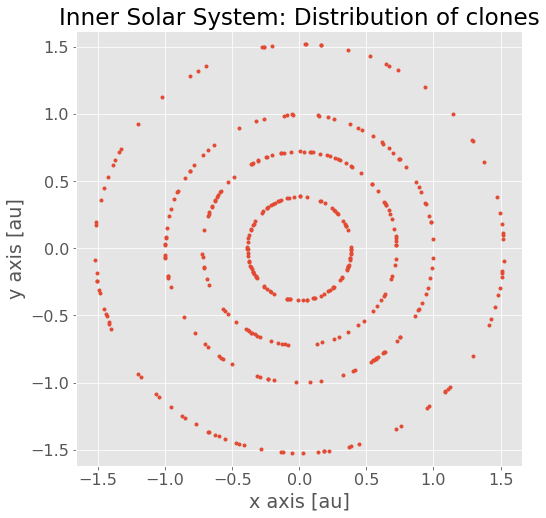

In [10]:
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.xlim(-1.62,1.62)
plt.ylim(-1.62,1.62)
plt.title("Inner Solar System: Distribution of clones")
plt.xlabel("x axis [au]")
plt.ylabel("y axis [au]")
plt.plot(coord['x'], coord['y'], '.')

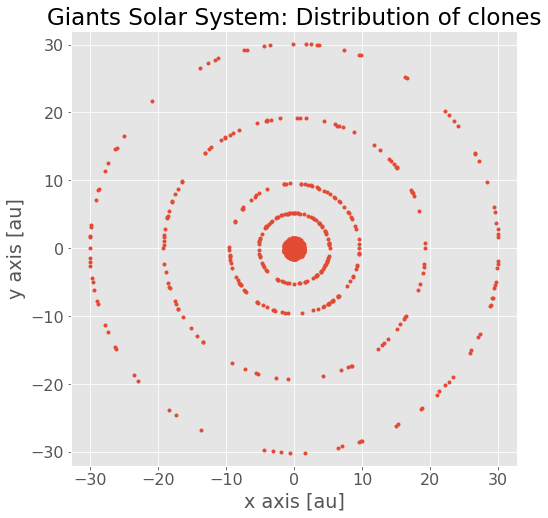

In [11]:
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.xlim(-32.0,32.0)
plt.ylim(-32.0,32.0)
plt.title("Giants Solar System: Distribution of clones")
plt.xlabel("x axis [au]")
plt.ylabel("y axis [au]")
plt.plot(coord['x'], coord['y'], '.')